# Employee Churn Analysis Project

### Determine which factors contribute to an employee's decision to leave a company
You can describe 10 attributes in detail as:
- ***satisfaction_level:*** It is employee satisfaction point, which ranges from 0-1.
- ***last_evaluation:*** It is evaluated performance by the employer, which also ranges from 0-1.
- ***number_projects:*** How many of projects assigned to an employee?
- ***average_monthly_hours:*** How many hours in averega an employee worked in a month?
- **time_spent_company:** time_spent_company means employee experience. The number of years spent by an employee in the company.
- ***work_accident:*** Whether an employee has had a work accident or not.
- ***promotion_last_5years:*** Whether an employee has had a promotion in the last 5 years or not.
- ***Departments:*** Employee's working department/division.
- ***Salary:*** Salary level of the employee such as low, medium and high.
- ***left:*** Whether the employee has left the company or not.

### Importing the Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from skimpy import clean_columns
from ipywidgets import interact  # interactive widgets


In [2]:
# import dataset

df0 = pd.read_csv('HR_Dataset.csv')
df0.head(1)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Departments,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low


In [3]:
# create a copy of the original dataset
df_first_version = df0.copy() 

In [4]:
df = clean_columns(df0)
df0.columns.tolist()

2 column names have been cleaned

['satisfaction_level',
 'last_evaluation',
 'number_project',
 'average_montly_hours',
 'time_spend_company',
 'Work_accident',
 'left',
 'promotion_last_5years',
 'Departments ',
 'salary']

In [10]:
df.head(10)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,work_accident,left,promotion_last_5years,departments,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
5,0.41,0.50,2,153,3,0,1,0,sales,low
6,0.10,0.77,6,247,4,0,1,0,sales,low
7,0.92,0.85,5,259,5,0,1,0,sales,low
8,0.89,1.00,5,224,5,0,1,0,sales,low
9,0.42,0.53,2,142,3,0,1,0,sales,low


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11991 entries, 0 to 11999
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     11991 non-null  float64
 1   last_evaluation        11991 non-null  float64
 2   number_project         11991 non-null  int64  
 3   average_montly_hours   11991 non-null  int64  
 4   time_spend_company     11991 non-null  int64  
 5   work_accident          11991 non-null  int64  
 6   left                   11991 non-null  int64  
 7   promotion_last_5years  11991 non-null  int64  
 8   departments            11991 non-null  object 
 9   salary                 11991 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.0+ MB


In [16]:
df.duplicated().value_counts()

False    11991
dtype: int64

In [17]:
df=df.drop_duplicates() # drop duplicates

In [18]:
#highlighting the rows where mean<std
def highlight_row(row):
    if row['mean'] < row['std']:
        return ['background-color: yellow'] * len(row)
    return [''] * len(row)

In [19]:
df.describe().T.style.apply(highlight_row, axis=1)

,count,mean,std,min,25%,50%,75%,max
satisfaction_level,11991.000000,0.629658,0.241070,0.090000,0.480000,0.660000,0.820000,1.000000
last_evaluation,11991.000000,0.716683,0.168343,0.360000,0.570000,0.720000,0.860000,1.000000
number_project,11991.000000,3.802852,1.163238,2.000000,3.000000,4.000000,5.000000,7.000000
average_montly_hours,11991.000000,200.473522,48.727813,96.000000,157.000000,200.000000,243.000000,310.000000
time_spend_company,11991.000000,3.364857,1.330240,2.000000,3.000000,3.000000,4.000000,10.000000
work_accident,11991.000000,0.154282,0.361234,0.000000,0.000000,0.000000,0.000000,1.000000
left,11991.000000,0.166041,0.372133,0.000000,0.000000,0.000000,0.000000,1.000000
promotion_last_5years,11991.000000,0.016929,0.129012,0.000000,0.000000,0.000000,0.000000,1.000000


In [20]:
def summary(df, pred=None):
    obs = df.shape[0]
    Types = df.dtypes
    Counts = df.apply(lambda x: x.count())
    Min = df.min()
    Max = df.max()
    Uniques = df.apply(lambda x: x.unique().shape[0])
    Nulls = df.apply(lambda x: x.isnull().sum())
    print('Data shape:', df.shape)

    if pred is None:
        cols = ['Types', 'Counts', 'Uniques', 'Nulls', 'Min', 'Max']
        str = pd.concat([Types, Counts, Uniques, Nulls, Min, Max], axis = 1, sort=True)

    str.columns = cols
    print('___________________________\nData Types:')
    print(str.Types.value_counts())
    print('___________________________')
    return str

# display(summary(df).sort_values(by='Nulls', ascending=False))

In [21]:
summary(df0)

Data shape: (14999, 10)
___________________________
Data Types:
int64      6
object     2
float64    2
Name: Types, dtype: int64
___________________________


,Types,Counts,Uniques,Nulls,Min,Max
Departments,object,14999,10,0,IT,technical
Work_accident,int64,14999,2,0,0,1
average_montly_hours,int64,14999,215,0,96,310
last_evaluation,float64,14999,65,0,0.36,1.0
left,int64,14999,2,0,0,1
number_project,int64,14999,6,0,2,7
promotion_last_5years,int64,14999,2,0,0,1
salary,object,14999,3,0,high,medium
satisfaction_level,float64,14999,92,0,0.09,1.0
time_spend_company,int64,14999,8,0,2,10


In [24]:
# Her bir sütunun benzersiz değerleri
for column in df0:
    unique_values = np.sort(df0[column].unique())
    print(f'Unique values of {column}:\n{unique_values}\n')

Unique values of satisfaction_level:
[0.09 0.1  0.11 0.12 0.13 0.14 0.15 0.16 0.17 0.18 0.19 0.2  0.21 0.22
 0.23 0.24 0.25 0.26 0.27 0.28 0.29 0.3  0.31 0.32 0.33 0.34 0.35 0.36
 0.37 0.38 0.39 0.4  0.41 0.42 0.43 0.44 0.45 0.46 0.47 0.48 0.49 0.5
 0.51 0.52 0.53 0.54 0.55 0.56 0.57 0.58 0.59 0.6  0.61 0.62 0.63 0.64
 0.65 0.66 0.67 0.68 0.69 0.7  0.71 0.72 0.73 0.74 0.75 0.76 0.77 0.78
 0.79 0.8  0.81 0.82 0.83 0.84 0.85 0.86 0.87 0.88 0.89 0.9  0.91 0.92
 0.93 0.94 0.95 0.96 0.97 0.98 0.99 1.  ]

Unique values of last_evaluation:
[0.36 0.37 0.38 0.39 0.4  0.41 0.42 0.43 0.44 0.45 0.46 0.47 0.48 0.49
 0.5  0.51 0.52 0.53 0.54 0.55 0.56 0.57 0.58 0.59 0.6  0.61 0.62 0.63
 0.64 0.65 0.66 0.67 0.68 0.69 0.7  0.71 0.72 0.73 0.74 0.75 0.76 0.77
 0.78 0.79 0.8  0.81 0.82 0.83 0.84 0.85 0.86 0.87 0.88 0.89 0.9  0.91
 0.92 0.93 0.94 0.95 0.96 0.97 0.98 0.99 1.  ]

Unique values of number_project:
[2 3 4 5 6 7]

Unique values of average_montly_hours:
[ 96  97  98  99 100 101 102 103 104 105 1

In [25]:
df["departments"].value_counts(dropna=False)

sales          3239
technical      2244
support        1821
IT              976
RandD           694
product_mng     686
marketing       673
accounting      621
hr              601
management      436
Name: departments, dtype: int64

In [26]:
df["salary"].value_counts(dropna=False)

low       5740
medium    5261
high       990
Name: salary, dtype: int64

In [27]:
df.corr(numeric_only=True).style.highlight_between(left=0.35, right=0.99, color='blue').highlight_between(left=-0.99, right=-0.35, color='blue')

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,work_accident,left,promotion_last_5years
satisfaction_level,1.000000,0.095186,-0.133246,-0.006252,-0.152915,0.039940,-0.350558,0.019789
last_evaluation,0.095186,1.000000,0.270256,0.264678,0.096829,-0.005695,0.013520,-0.007206
number_project,-0.133246,0.270256,1.000000,0.331516,0.188837,-0.005612,0.030928,-0.000544
average_montly_hours,-0.006252,0.264678,0.331516,1.000000,0.102875,-0.012860,0.070409,-0.004964
time_spend_company,-0.152915,0.096829,0.188837,0.102875,1.000000,0.000003,0.173295,0.056828
work_accident,0.039940,-0.005695,-0.005612,-0.012860,0.000003,1.000000,-0.125436,0.029852
left,-0.350558,0.013520,0.030928,0.070409,0.173295,-0.125436,1.000000,-0.044657
promotion_last_5years,0.019789,-0.007206,-0.000544,-0.004964,0.056828,0.029852,-0.044657,1.000000


## Data Visualization

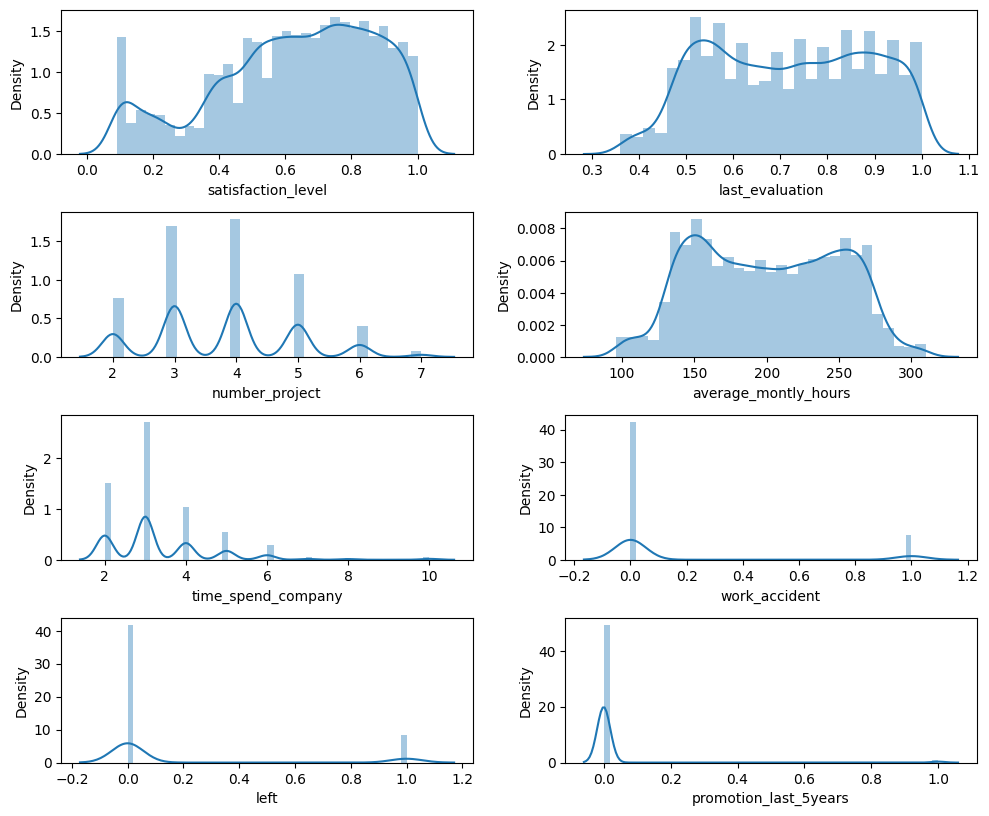

In [28]:
figure_columns = df.select_dtypes(include='number').columns.tolist()
# Distribution of the numericalfeatures

fig = plt.figure(figsize=(10,20))
for i, col in enumerate(figure_columns):
        plt.subplot(10,2,i+1)
        sns.distplot(df[col],)
plt.tight_layout();

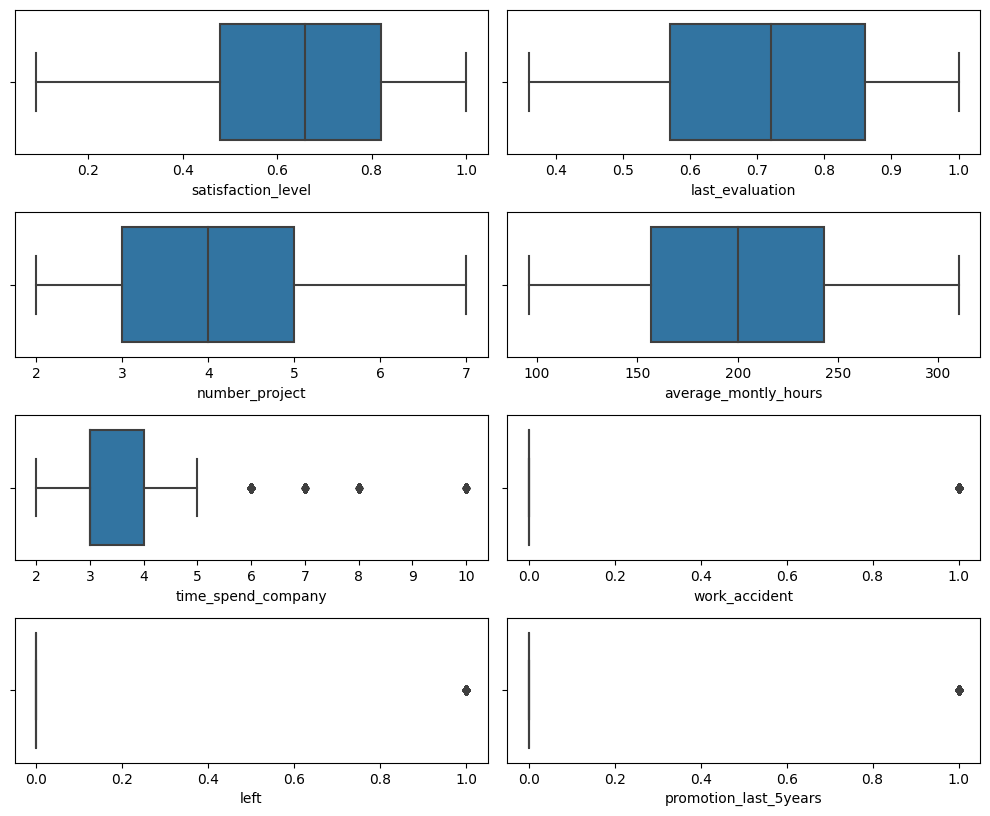

In [29]:
# Distribution of the numericalfeatures

fig = plt.figure(figsize=(10,20))
for i, col in enumerate(figure_columns):
        plt.subplot(10,2,i+1)
        sns.boxplot(x = df[col])
plt.tight_layout();

In [30]:
def column_box(col):
    sns.boxplot(data = df,
                y= df[col],
                x=df["departments"],
                palette='Dark2')
    plt.xticks(rotation=90)
cols = figure_columns
interact(column_box, col=cols);
# boxplot of the numerical features by department

interactive(children=(Dropdown(description='col', options=('satisfaction_level', 'last_evaluation', 'number_pr…

In [31]:
def column_pair(col1,col2):
    sns.pairplot(df,
                 vars=[col1,col2],
                 hue="departments",
                 height= 2,
                 aspect= 2,
                 palette='Dark2')
cols1 = figure_columns
cols2 = figure_columns
interact(column_pair, col1=cols1, col2=cols2);

interactive(children=(Dropdown(description='col1', options=('satisfaction_level', 'last_evaluation', 'number_p…

In [33]:
def column_pair(col1,col2, col3):
    sns.pairplot(df,
                 vars=[col1,col2, col3],
                 hue="left",
                 height= 2,
                 aspect= 2,
                 palette='Dark2')
cols1 = figure_columns
cols2 = figure_columns
cols3 = figure_columns
interact(column_pair, col1=cols1, col2=cols2, col3=cols3);

interactive(children=(Dropdown(description='col1', options=('satisfaction_level', 'last_evaluation', 'number_p…

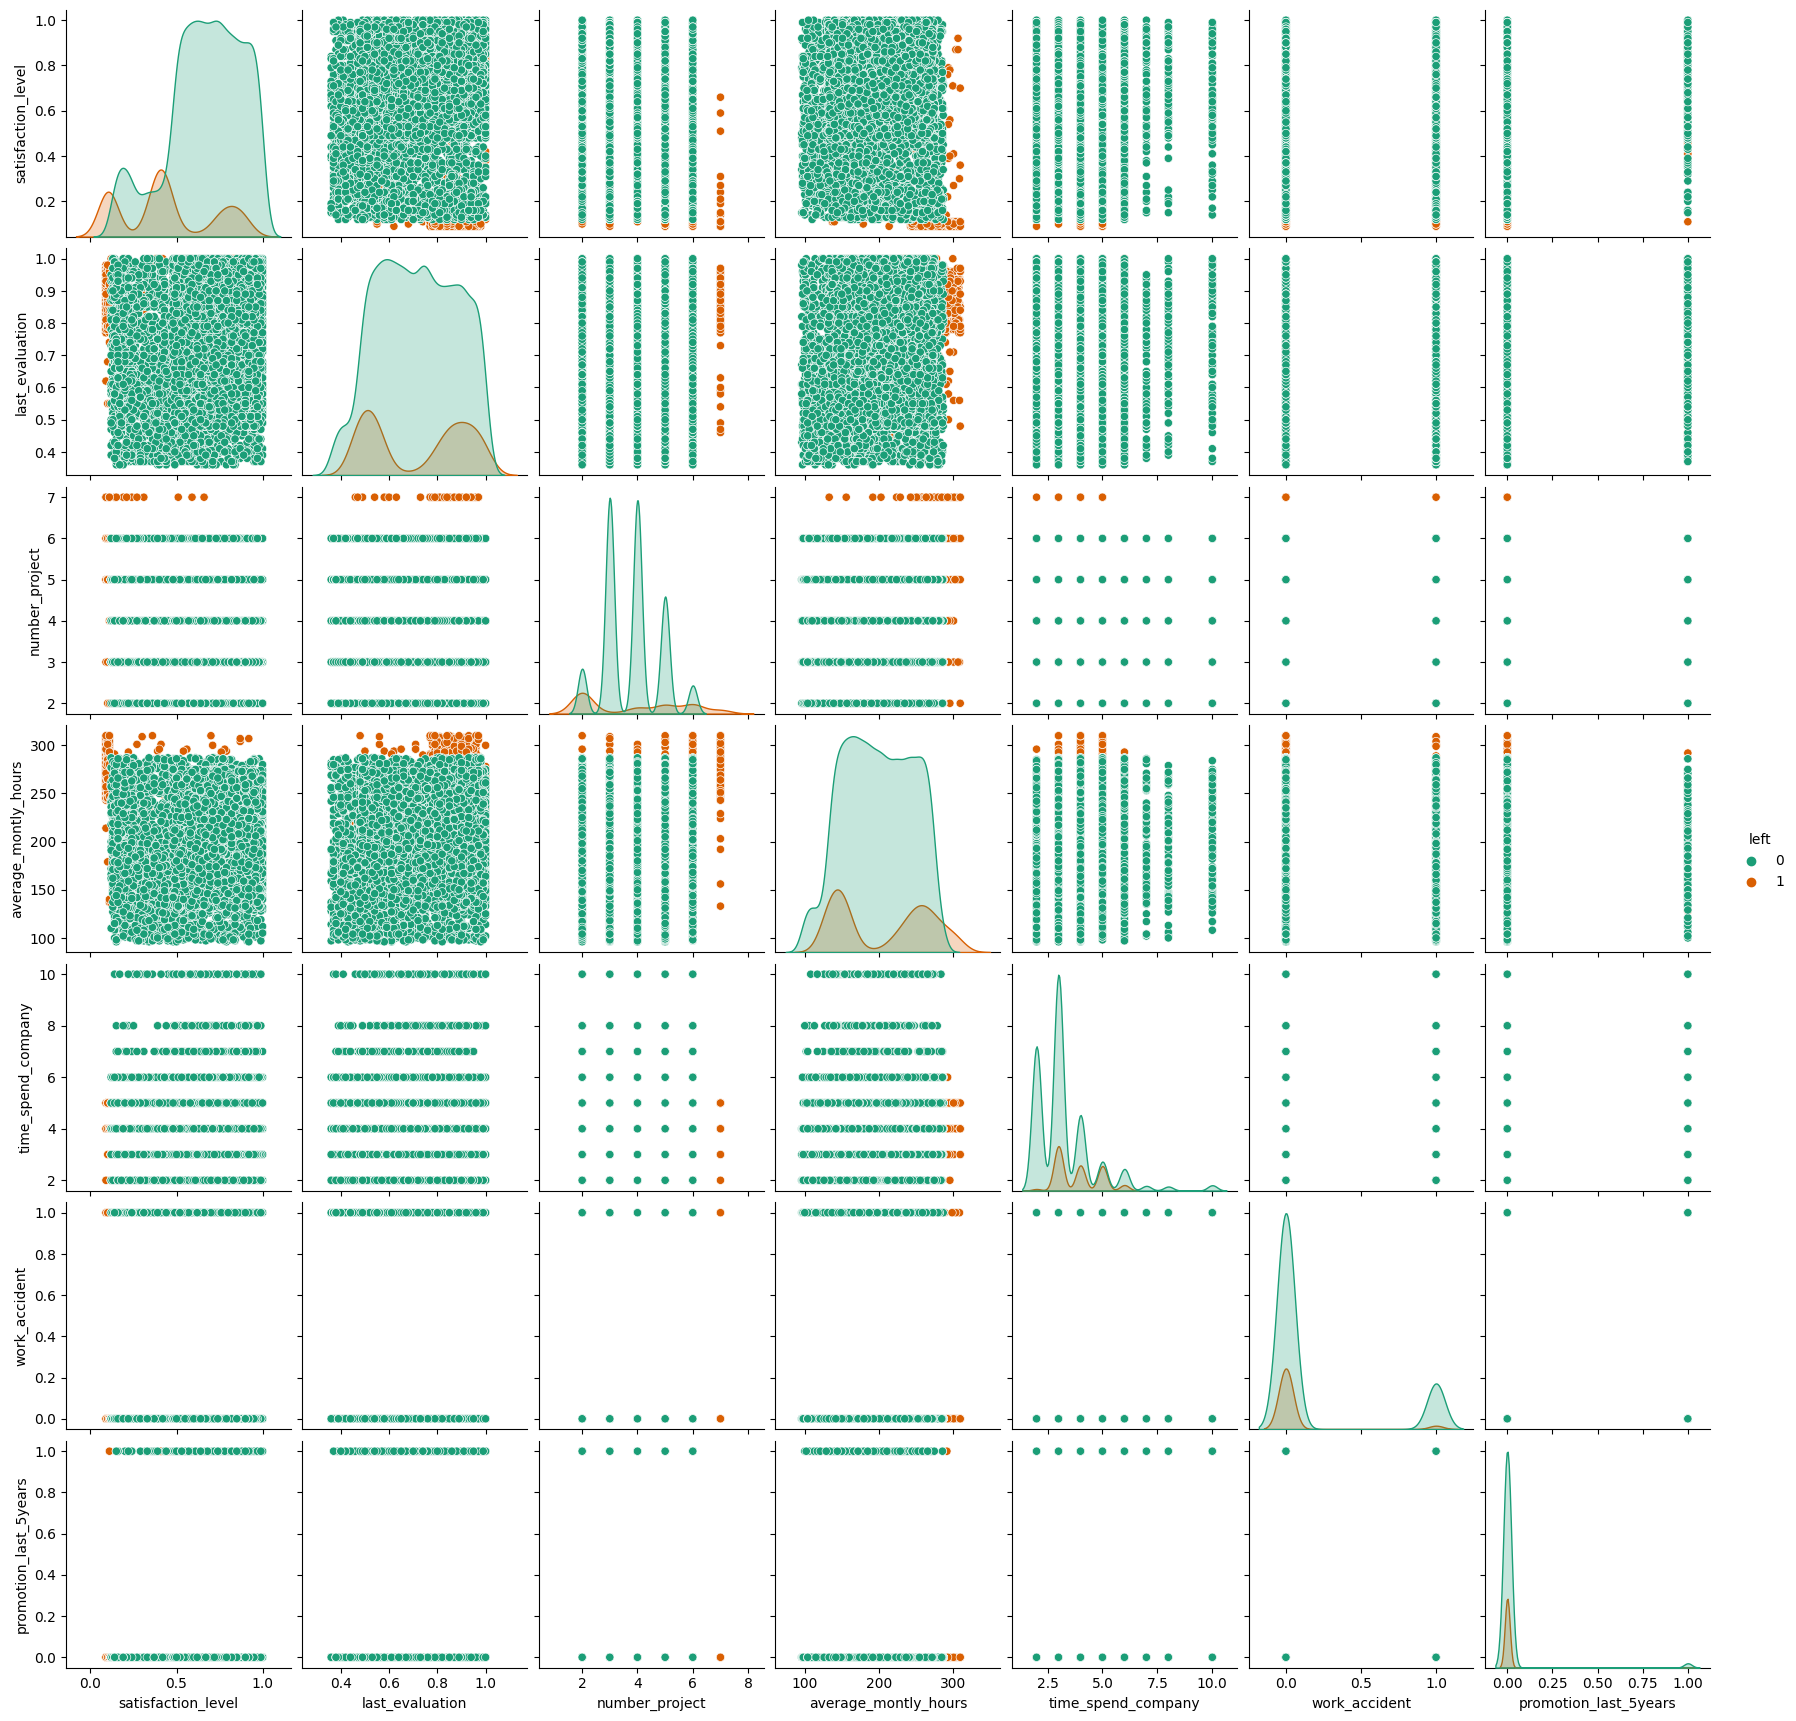

In [34]:
sns.pairplot(df.drop(["salary", "departments"], axis=1), hue="left", palette='Dark2');

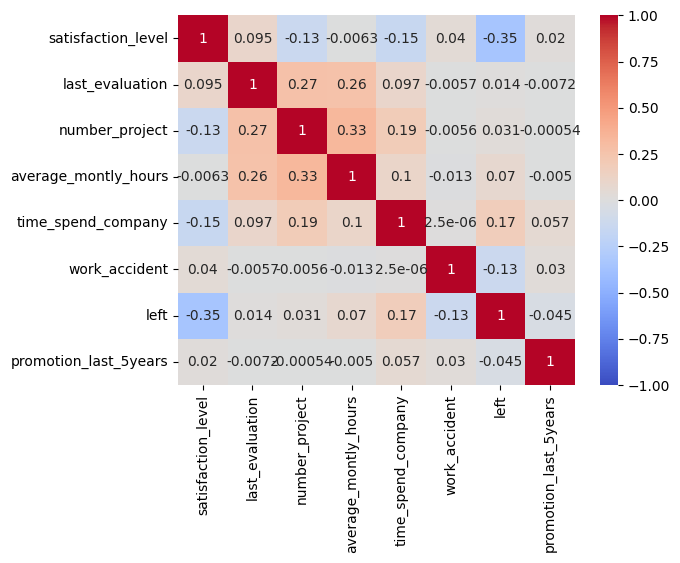

In [35]:
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm', vmax=1, vmin=-1);

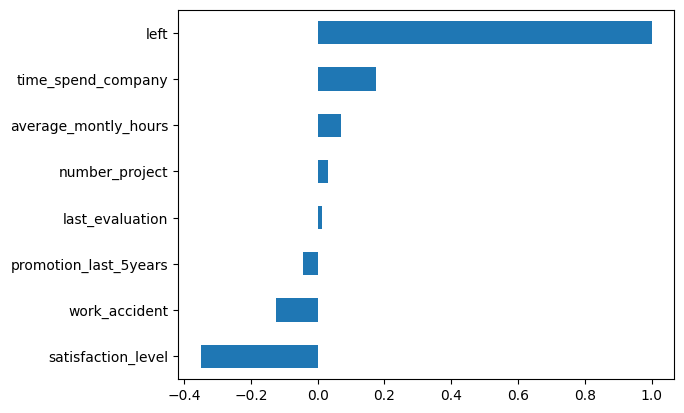

In [36]:
df.corr()["left"].sort_values().plot.barh();

In [39]:
df.groupby('salary')['left'].mean()

salary
high      0.048485
low       0.204530
medium    0.146170
Name: left, dtype: float64

In [40]:
df["salary"] = df["salary"].map({'low':0, 'medium':1, 'high':2})

In [41]:
df[(df["left"] == 1) & (df["salary"] == 0)].count()

satisfaction_level       1174
last_evaluation          1174
number_project           1174
average_montly_hours     1174
time_spend_company       1174
work_accident            1174
left                     1174
promotion_last_5years    1174
departments              1174
salary                   1174
dtype: int64

In [42]:
df[df["salary"] == 0].count()

satisfaction_level       5740
last_evaluation          5740
number_project           5740
average_montly_hours     5740
time_spend_company       5740
work_accident            5740
left                     5740
promotion_last_5years    5740
departments              5740
salary                   5740
dtype: int64

In [43]:
2172/7316 #churn rate for low salary

0.2968835429196282

In [44]:
df["salary"].value_counts(dropna=False)

0    5740
1    5261
2     990
Name: salary, dtype: int64

In [45]:
df["salary"].value_counts(dropna=False, normalize=True).round(2)

0    0.48
1    0.44
2    0.08
Name: salary, dtype: float64

salary,0,1,2
left,20.5,14.6,4.8


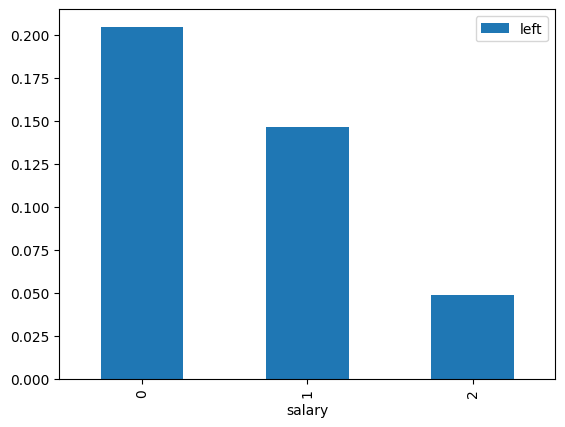

In [28]:
pd.DataFrame(df.groupby('salary')['left'].mean()).sort_values('left',ascending=False).plot(kind='bar')
pd.DataFrame(df.groupby('salary')['left'].mean()).sort_values('left',ascending=False).round(3).T*100
#salary and left are linearly correlated

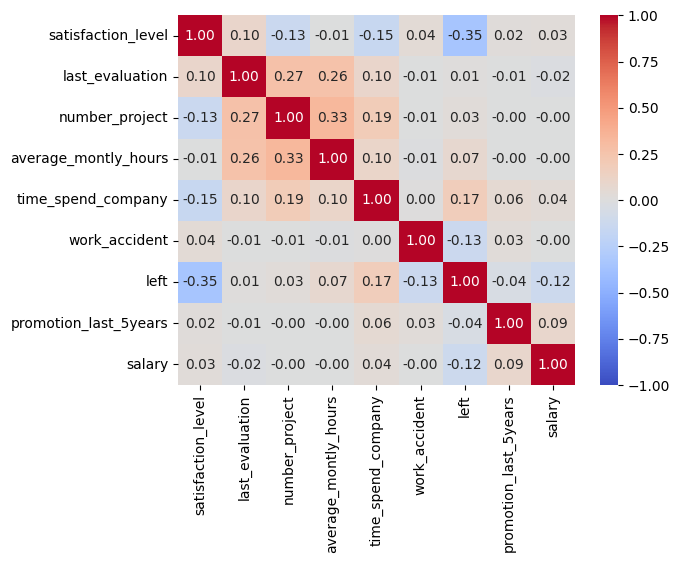

In [46]:
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm', vmax=1, vmin=-1, fmt='.2f');

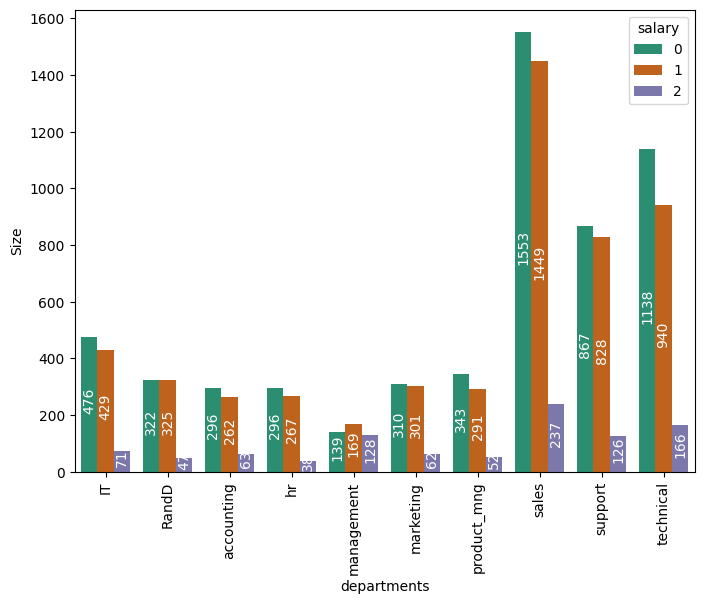

In [47]:
#taking a closer look at salaries across departments
class_digit = df.groupby(['departments', 'salary']).size()
class_label = pd.DataFrame(class_digit, columns=['Size']).reset_index()
plt.figure(figsize=(8, 6))
ax = sns.barplot(x='departments', y='Size', hue='salary', data=class_label, palette='Dark2')
for container in ax.containers:
    ax.bar_label(container, rotation=90, padding=3, label_type='center', color='white')
plt.xticks(rotation=90);

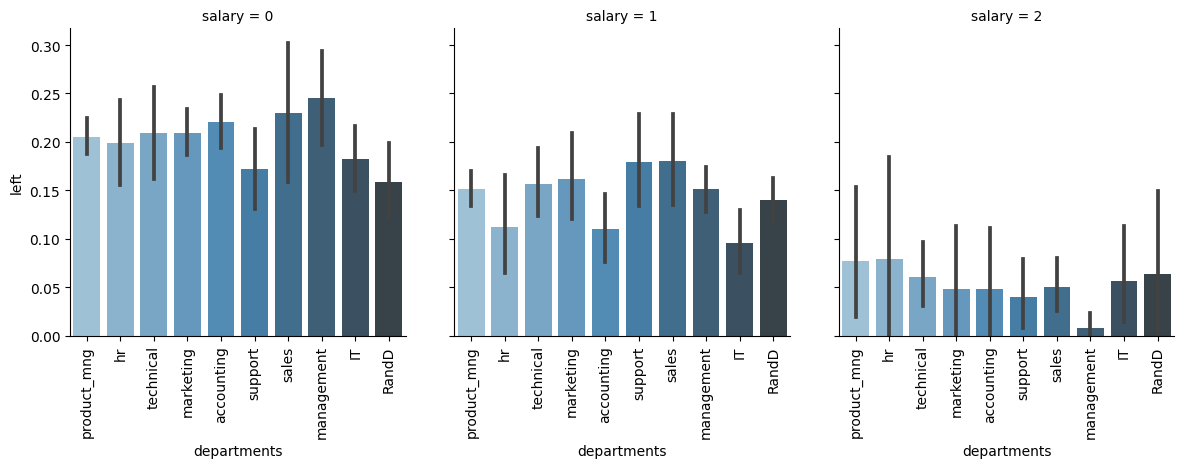

In [48]:
g = sns.FacetGrid(df,col='salary',height=4)
ax = g.map(sns.barplot, "departments", "left", palette = "Blues_d")
ax.set_xticklabels(rotation = 90);

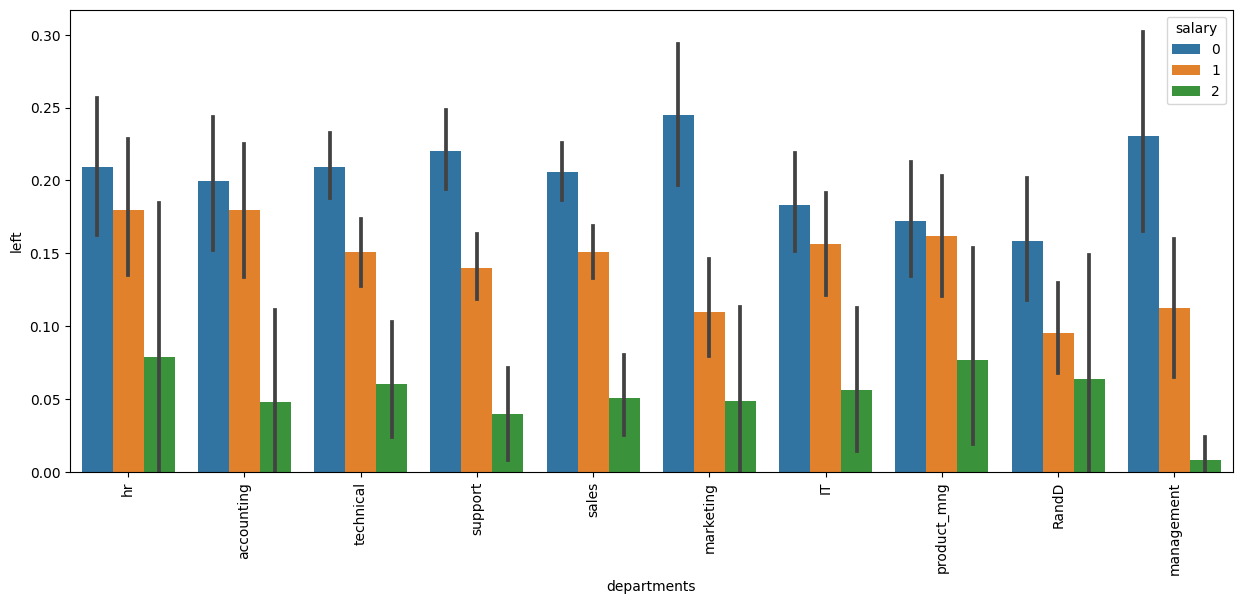

In [52]:
plt.figure(figsize=(15,6))
result = df.groupby(["departments"])['left'].aggregate(np.mean).reset_index().sort_values('left',ascending=False)
sns.barplot(x='departments', y="left", data=df, hue='salary',order=result['departments'])
plt.xticks(rotation=90)
plt.show()

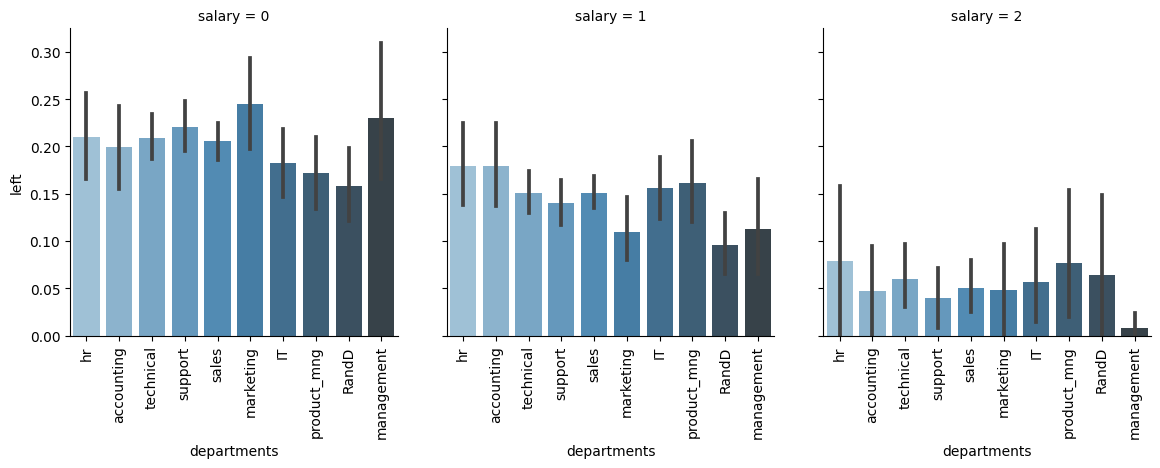

In [53]:
g = sns.FacetGrid(df,col='salary',height=4)
ax = g.map(sns.barplot, "departments", "left", palette = "Blues_d", order=result['departments'])
ax.set_xticklabels(rotation = 90);

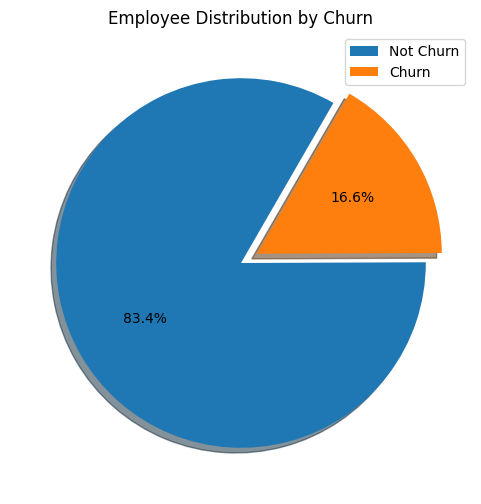

In [54]:
plt.figure(figsize=(6,6))

explode = [0,0.1]
plt.pie(df['left'].value_counts(),explode=explode,autopct='%1.1f%%',shadow=True,startangle=60)
plt.legend(labels=['Not Churn','Churn'])
plt.title('Employee Distribution by Churn')
plt.axis('off')
plt.show()

#inbalanced data

In [55]:
df.to_csv('Employee Churn Analysis Project EDA Last Version', index=False)

Try to find hidden patterns in data with the help of unsupervised learning algorithms.
Don't try to use clustering algoritms for classfication.